# Photo-Absorption

## 1. Lambert-Beer absorption law 
 
The attenuation of the solar radiation as it travels through the atmosphere is given by the __Lambert-Beer absoprtion law__ which is given by the following expression:
<br>
<br>

<p align="center">
 $I (z_0,\lambda,\chi_0) = I_{\infty}\exp[-\tau (z_0,\lambda,\chi_0)]$

where $I (z_0,\lambda,\chi_0)$ is the intensity at the altitude $z_0$ in the atmosphere, at a wavelength $\lambda$ and a solar zenith angle $\chi_0$. $I_{\infty}$ represents the irradiance at "infinity" and $\tau$ __the optical depth__ which specifies the attenuation of the solar irradiance by the atmosphere.<br>

## 2. The optical depth

For a slant path of the solar radiation on a spherical Earth of radius $R$  and considering $\chi_0 < 90^{\circ}$, we have:
<br>

$\frac{\sin \chi}{R+z_0}=\frac{\sin \chi_0}{R+z}$


![GitHub Logo](./Rees.png)
Fig1. - Geometry adopted for computing the attenuation of solar irradiance (not to scale). __[M. H. Rees, 1989](http://www.sp.ph.ic.ac.uk/~ingomw/Reading_material/Rees_Chapters1_2.pdf)__.
<br>

It is easy to show that:

$ \frac{1}{\cos \chi}=\bigg[1-\bigg(\frac{R+z_0}{R+z}\bigg)^2 \sin^2\chi_0\bigg]^{-1/2}$

<br>

The optical depth is given by:
<br>

$\tau (z_0,\lambda,\chi_0) = \sum_{j} \sigma_j^a(\lambda) \int_{z_0}^{\infty} n_j(z)\bigg[1-\bigg(\frac{R+z_0}{R+z}\bigg)^2 \sin^2\chi_0\bigg]^{-1/2}dz $

where $\sigma_j^a$ represents the wavelength-dependent absorption cross section of a species $j$ and $n_j(z)$ is the height profile of its concentrations. For $\chi_0 << 90^{\circ}$ it is found that $\sec \chi \approx \sec \chi_0$, as a consequence:

$\tau (z_0,\lambda,\chi_0) = \sum_{j} \sigma_j^a(\lambda) \int_{z_0}^{\infty} \frac{n_j(z)}{\cos \chi_0}dz $

__N.B.__: The absorption cross-section refers to the ability of a particular molecule to absorb a photon of a particular wavelength.


## 3. Useful websites and references

-  Earth atmospheric models (to get $n_j(z)$):
    -  __[NRLMSISE-00 Atmosphere Model](https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php)__
-  Solar Variability (to get $I_\infty$):
    -  __[TIMED SEE Solar Spectral Irradiance](http://lasp.colorado.edu/lisird/data/timed_see_ssi_l3/)__
    -  __[F10.7 cm Radio Emissions](https://www.swpc.noaa.gov/phenomena/f107-cm-radio-emissions)__
    -  __[NOAA Space Weather Prediction Center](https://www.swpc.noaa.gov/)__
-  Solar zenith angle ($\chi_0$):
    -  __[ NOAA ESRL Solar Position Calculator ](https://www.esrl.noaa.gov/gmd/grad/solcalc/azel.html)__
-  Books and references (to get $\sigma_j^a(\lambda)$ and more information):
    -  __[R. W. Schunk and A. F. Nagy, 2009](https://www.researchgate.net/publication/253827157_Ionospheres)__
    -  __[M. H. Rees, 1989](http://www.sp.ph.ic.ac.uk/~ingomw/Reading_material/Rees_Chapters1_2.pdf)__


## Task1


Consider Earth, choose a time, $\chi_0 \neq 0$, in sunlight. <br>
1. Calculate and plot $I(z_0,\lambda, \chi_0)$ for Ly-$\alpha$ (1215 <span>&#8491;</span>) and a $\lambda < 1000$ <span>&#8491;</span>
2. Plot for relevant species [4] and state $\sigma_j^a(\lambda)$ and $I_\infty(\lambda)$

## Solution 

In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pds
%pylab 
%matplotlib inline
pylab.rcParams['figure.figsize'] = (9, 7)

####################################
# Reading the NRLMSISE-00 file
####################################
def read_NRLMSIS(file, columns):
    df=pds.read_csv(file, skiprows=34, delim_whitespace=True,header=None,
                      index_col=0)
    df.index.name="Alt"
    df.columns=columns
    return df

####################################
# Reading the TIMED SEE file
####################################

def read_TIMED(file):
    df=pds.read_csv(file,index_col=1) # index= wavelength
    return df

#####################################################################
# Compute the Irradiance as a function of the optical depth
# if species=True, the output is the Intensity I for each species j
# if species=False, the output is the Intensity I of the total species
######################################################################
    
def Photo_Absorption(df,c_section, I_infinity,angle_deg, wavelength, j=None, species=False):

    Earth_Radii=6371 #km
    alt=df.index
    chsi=angle_deg*np.pi/180
    
    
    if species:
        
        I=[]
        
        for i in np.arange(len(alt)):
            z0=alt[i]
            z=alt[i:-1]
            dz=1*np.ones(len(z))*1e5 # dz in cm
            ratio=(Earth_Radii+z0)/(Earth_Radii+z)

            density=df[df.columns[j]][z]
            function= density*(1-(ratio**2)*np.sin(chsi)**2)**(-0.5)
            Tau=c_section[j]*np.trapz(function, x=z, dx=dz)
            I.append(I_infinity*np.exp(-Tau))
            i+=1
    else:
             
        Tau=numpy.zeros((len(c_section), len(alt)))
        
        print('============================')
        print('Wavelength=', str(wavelength) + ' Angstrom' )
        print('============================')
        
        for s in np.arange(len(c_section)):
            
            

            print('species= ',df.columns[s] + ' // cross_section=', str(c_section[s]) + ' cm^2' )
            #print('cross_section=', str(c_section[s]) + ' cm^2')

            for i in np.arange(len(alt)):
                z0=alt[i]
                z=alt[i:-1]
                dz=1*np.ones(len(z))*1e5 # dz in cm
                ratio=(Earth_Radii+z0)/(Earth_Radii+z)

                density=df[df.columns[s]][z]
                function= density*(1-(ratio**2)*np.sin(chsi)**2)**(-0.5)
                Tau[s][i]=c_section[s]*np.trapz(function, x=z, dx=dz)
                i+=1
            s+=1

        Tau_tot=np.sum(Tau, axis=0)
        I=I_infinity*exp(-Tau_tot)
    
    return I

    
def plt_axis(fontsize, grid=False):
    
    ax=plt.gca()
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    
    ax.tick_params('both', length=5, width=2, which='major')
    plt.minorticks_on()
    
    if grid:
        ax.grid(color='silver', linestyle='--')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
        
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
        

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## 1. Calculate and plot $I(z_0,\lambda, \chi_0)$ for Lyman-$\alpha$ (1215 <span>&#8491;</span>) and a $\lambda < 1000$ <span>&#8491;</span>

-  From the Earth atmosphere model __[NRLMSISE-00 Atmosphere Model](https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php)__ we download the density profile for different species: $\text{O}$, $\text{O}_2$, $\text{He}$, and $\text{N}_2$. 
-  From __[TIMED SEE Solar Spectral Irradiance](http://lasp.colorado.edu/lisird/data/timed_see_ssi_l3/)__ we get the solar irradiance. We choose __2014-01-22__ (solar maximum), __Latitue=$ +25{^\circ}$__, __Longitude=$ +5{^\circ}$__, and __UT=12__.
-  From __[ NOAA ESRL Solar Position Calculator ](https://www.esrl.noaa.gov/gmd/grad/solcalc/azel.html)__ we find for the same above parameters, __the solar zenith angle $\chi_{0}=45{^\circ}$__.

<br>
In the following cells we read the different files and do the plottings



In [2]:
# Reading the NRLMSISE-00 file
df_NRL=read_NRLMSIS("nrlmsise_584_2014.lst", ["O","N2","O2","He"])
# Reading the TIMED SEE file 
df_TIMED=read_TIMED("timed_see_ssi_l3_2014.csv")
df_TIMED.index=df_TIMED.index*10 # wavelength from nm to Angstrom

### __Number density for the different species as a function of altitude__

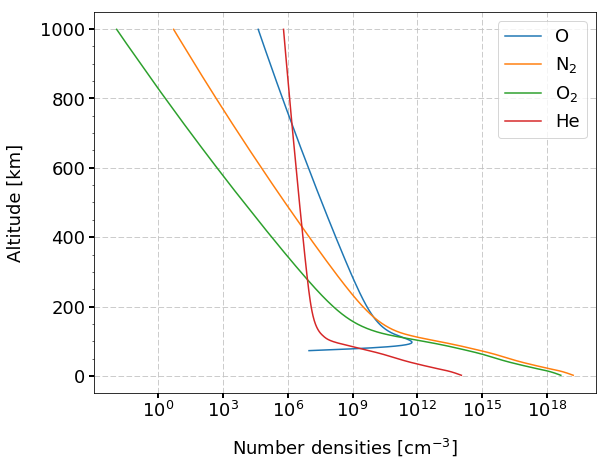

In [9]:
plt.plot(df_NRL["O"],df_NRL.index, label="O")
plt.plot(df_NRL["N2"],df_NRL.index, label='N'r'$_2$')
plt.plot(df_NRL["O2"],df_NRL.index,label='O'r'$_2$')
plt.plot(df_NRL["He"],df_NRL.index,label='He')
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.semilogx()
plt.legend(fontsize=18)
plt_axis(18, grid=True)

__N.B.__ The concentration of heavy constituents($\text{O}_{2}$ and $\text{N}_{2}$) decrease faster than that of light constituents ($\text{O}$, and $\text{He}$) with increasing altitude. </font>


### __Solar irradiance__

0.00881299283356
0.000154311477672


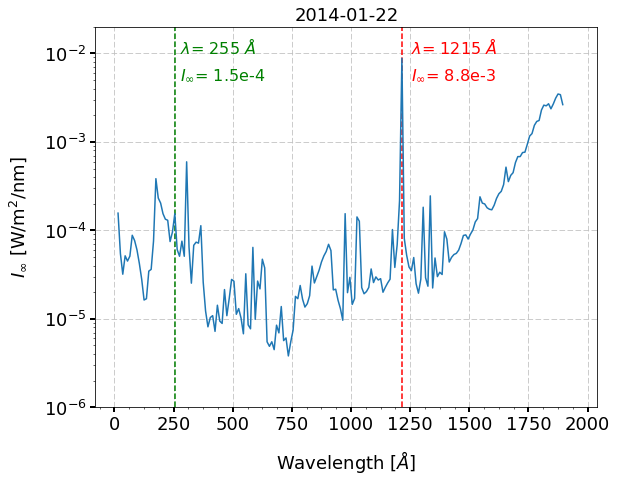

In [15]:
ax=plt.gca()
plt.plot(df_TIMED.index,df_TIMED["irradiance (W/m^2/nm)"])
plt.ylabel(r'$I_\infty$'  ' [W/m' r'$^{2}$/nm]')
plt.xlabel('Wavelength [$\AA$]')
plt.semilogy()
plt_axis(18, grid=True)
plt.ylim(1e-6, 2e-2)
plt.title('2014-01-22', fontsize=18)

Lyalpha=1215
Lambda=255
Lya=find_nearest(df_TIMED.index,Lyalpha)
Lambda0=find_nearest(df_TIMED.index,Lambda)
plt.vlines(x=Lya, ymin=1e-6, ymax=2e-2, color='r', linestyles='--')
plt.vlines(x=Lambda0, ymin=1e-6, ymax=2e-2, color='g', linestyles='--')
plt.text(1252,1e-2, r'$\lambda$= 1215 $\AA$', fontsize=16, color='r')
plt.text(1252,5e-3, r'$ I_{\infty}$= 8.8e-3 ', fontsize=16, color='r')
plt.text(278,1e-2, r'$\lambda$= 255 $\AA$', fontsize=16, color='g')
plt.text(278,5e-3, r'$ I_{\infty}$= 1.5e-4 ', fontsize=16, color='g')

print(df_TIMED["irradiance (W/m^2/nm)"][Lya])
print(df_TIMED["irradiance (W/m^2/nm)"][Lambda0])

### Absorption cross section and $I_{\infty}$


|                                         | $\text{O}$| $\text{N}_2$| $\text{O}_2$| $\text{He}$ | $\text{O}_3$|
|-----------------------------------------|--------------|-------------|------------|------------|------------|
| $\sigma^a$ (1215 <span>&#8491;</span> ) [$\times 10^{-20}\text{cm}^2$] | $0$ | $1.13$ |  $0$ |  $0$|$0$|
| $\sigma^a$ (255 <span>&#8491;</span>) [$\times 10^{-18}\text{cm}^2$]  | $6.46$|$10.49$|$14.39$|$2.32$|$0$|

<br>

|                                         | $I_{\infty}$ |
|-----------------------------------------|--------------|
| $\sigma^a$ (1215 <span>&#8491;</span> )| $0.0088$ |
| $\sigma^a$ (255 <span>&#8491;</span>) | $0.00015$|

__N.B.__ The absorption cross section of Ozone ($\text{O}_3$, which dominates at lower altitude $\sim 20-50 \text{km}$) peaks around 2500 <span>&#8491;</span>. It is negligible for the different $\lambda$ values that we use here.</font> 


###  __Irradiance for__ $\lambda= 1215$ <span>&#8491;</span> __and__ $\lambda=255$ <span>&#8491;</span>

Wavelength= 1215 Angstrom
species=  O // cross_section= 0 cm^2
species=  N2 // cross_section= 1.13e-20 cm^2
species=  O2 // cross_section= 0 cm^2
species=  He // cross_section= 0 cm^2
Wavelength= 255 Angstrom
species=  O // cross_section= 6.46e-18 cm^2
species=  N2 // cross_section= 1.049e-17 cm^2
species=  O2 // cross_section= 1.439e-17 cm^2
species=  He // cross_section= 2.32e-18 cm^2


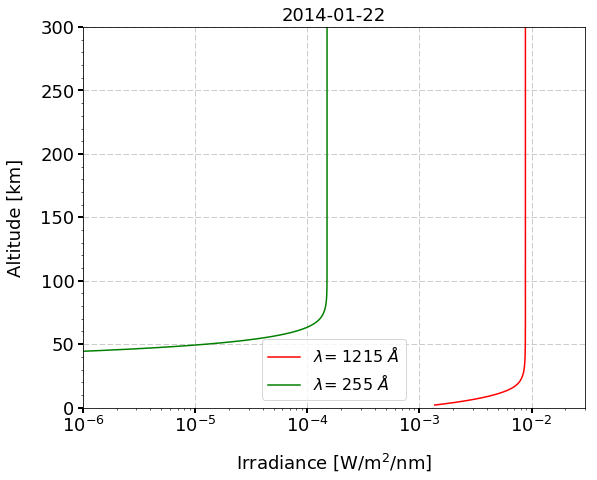

In [16]:
Ly_alpha=[0,1.13e-20,0,0]
Iinf_Ly=8.8e-3
I_Ly=Photo_Absorption(df_NRL,Ly_alpha,Iinf_Ly, 35, 1215)

Lambda=[6.46e-18, 10.49e-18, 14.39e-18, 2.32e-18]
Iinf_Lambda=1.5e-4 
I_Lam=Photo_Absorption(df_NRL,Lambda,Iinf_Lambda, 35, 255)

plt.plot(I_Ly,df_NRL.index, c='r', label=r'$\lambda$= 1215 $\AA$')
plt.plot(I_Lam,df_NRL.index, c='g', label=r'$\lambda$= 255 $\AA$')
plt.ylabel('Altitude [km]')
plt.xlabel('Irradiance [W/m' r'$^{2}$/nm]')
plt.title('2014-01-22', fontsize=16)
plt.semilogx()
plt.xlim(1e-6, 3e-2)
plt.ylim(0, 300)
plt.legend(fontsize=16)
plt_axis(18, grid=True)

__N.B.__ The higher is the energy (shorter wavelengths), up to a certain limit, the higher is the cross section, and so the absoprtion is faster. </font> 


## 2. Plot for relevant species [4] and state $\sigma_j^a(\lambda)$ and $I_\infty(\lambda)$


Wavelength= 255 Angstrom
species=  O // cross_section= 6.46e-18 cm^2
species=  N2 // cross_section= 1.049e-17 cm^2
species=  O2 // cross_section= 1.439e-17 cm^2
species=  He // cross_section= 2.32e-18 cm^2


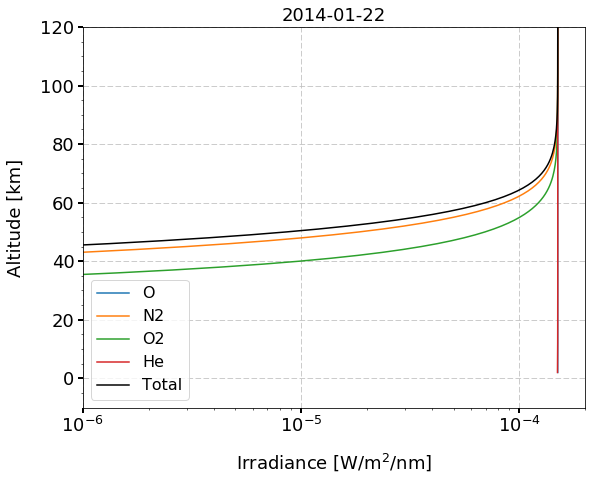

In [18]:

Lambda=[6.46e-18, 10.49e-18, 14.39e-18, 2.32e-18]
Iinf_Lambda=1.5e-4  
  

for j in np.arange(len(Lambda)):
    
    I_Lam=Photo_Absorption(df_NRL,Lambda,Iinf_Lambda, 45, 255, j, species=True)
    plt.plot(I_Lam, df_NRL.index, label=df_NRL.columns[j])
    
I_tot=Photo_Absorption(df_NRL,Lambda,Iinf_Lambda, 45, 255)
plt.plot(I_tot, df_NRL.index, c='k', label='Total')
    
plt.ylabel('Altitude [km]')
plt.xlabel('Irradiance [W/m' r'$^{2}$/nm]')
plt.title('2014-01-22', fontsize=18)
plt.semilogx()
plt.xlim(1e-6, 2e-4)
plt.ylim(-10,120)
plt.legend(fontsize=16)
plt_axis(18, grid=True)